# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


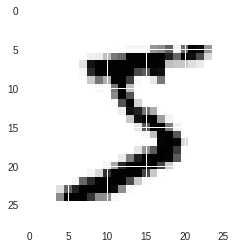

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
#?Convolution2D
?MaxPooling2D

In [0]:
from keras.layers import Activation

def BuildModel1():
  model = Sequential()
  model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1))) # output size 26x26
  # add few more convolutions...
  model.add(Convolution2D(64, (3,3), activation='relu'))  # output 24x24
  model.add(Convolution2D(128, (3,3), activation='relu'))  # output 22x22
  model.add(Convolution2D(256, (3,3), activation='relu'))  # output 20x20
  model.add(MaxPooling2D( (2,2))) # output 10x10

  model.add(Convolution2D(512, (3,3), activation='relu'))  # output 8x8
  model.add(Convolution2D(1024,(3,3), activation='relu'))  # output 6x6

  model.add(Convolution2D(10, 1, activation='relu')) # kernel of 1x1, num of filters 10
  model.add(Convolution2D(10, 6))  # kernel of 6x6, number of filters 10
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model

# only Conv layers
def BuildModelConv():
  model = Sequential()
  model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1))) # output size 26x26
  # add few more convolutions...
  model.add(Convolution2D(64, (3,3), activation='relu'))  # output 24x24
  model.add(Convolution2D(128, (3,3), activation='relu'))  # output 22x22
  model.add(Convolution2D(256, (3,3), activation='relu'))  # output 20x20
  model.add(Convolution2D(512, (3,3), activation='relu'))  # output 18x18
  model.add(Convolution2D(1024,(3,3), activation='relu'))  # output 16x16
  
  model.add(Convolution2D(10, 1, activation='relu')) # kernel of 1x1, num of filters 10
  model.add(Convolution2D(10, 16))  # kernel of 16x16, number of filters 10
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model
  
 # conv -> conv -> max pool -> conv -> conv
def BuildModel2():
  model = Sequential()
  model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1))) # output size 26x26
  model.add(Convolution2D(64, (3,3), activation='relu'))  # output 24x24
  
  model.add(MaxPooling2D((2,2)))  # output 12x12
  
  model.add(Convolution2D(128, (3,3), activation='relu'))  # output 10x10
  model.add(Convolution2D(10, 10))  # kernel of 10x10 number of filters 10
  
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model


def BuildModel3():
  model = Sequential()
  model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1))) # output size 26x26
  model.add(Convolution2D(64, (3,3), activation='relu'))  # output 24x24
  
  model.add(MaxPooling2D((2,2)))  # output 12x12
  
  model.add(Convolution2D(128, (3,3), activation='relu'))  # output 10x10
  model.add(Convolution2D(256, (3,3), activation='relu'))  # output 8x8
  model.add(Convolution2D(10, 8))  # kernel of 8x8 number of filters 10
  
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model
 

In [0]:
# build the model

##model = BuildModelConv() ## Accuracy 99.01
##model = BuildModel1()  ## Accuracy 99.01

#model = BuildModel2() ## Accuracy 99.09, simple model, less params

model = BuildModel3() ## Accuracy 99.16, Model2 + one more conv layer.



In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 1, 1, 10)          163850    
_________________________________________________________________
flatten_8 (Flatten)          (None, 10)                0         
__________

In [0]:
from keras.utils import plot_model

plot_model(model, 'model.png')

<href img='./model.png'>

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 27s 458us/step - loss: 0.0990 - acc: 0.9697
Epoch 2/10
60000/60000 [==============================] - 26s 439us/step - loss: 0.0340 - acc: 0.9896
Epoch 3/10
60000/60000 [==============================] - 26s 437us/step - loss: 0.0250 - acc: 0.9919
Epoch 4/10
60000/60000 [==============================] - 26s 439us/step - loss: 0.0190 - acc: 0.9942
Epoch 5/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.0128 - acc: 0.9961
Epoch 6/10
60000/60000 [==============================] - 26s 439us/step - loss: 0.0113 - acc: 0.9966
Epoch 7/10
60000/60000 [==============================] - 26s 439us/step - loss: 0.0086 - acc: 0.9973
Epoch 8/10
60000/60000 [==============================] - 26s 439us/step - loss: 0.0075 - acc: 0.9976
Epoch 9/10
60000/60000 [==============================] - 26s 437us/step - loss: 0.0074 - acc: 0.9977
Epoch 10/10
60000/60000 [==============================] - 26s 434us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.04588405300589125, 0.9916]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.0296702e-17 3.3114574e-21 3.9102481e-09 2.4225286e-14 2.8672215e-25
  4.3671178e-20 3.2386255e-28 1.0000000e+00 3.9577097e-19 4.9807443e-15]
 [1.0542139e-15 3.3086103e-17 1.0000000e+00 2.3050347e-20 2.6676469e-16
  1.9026720e-26 7.9079059e-16 1.0429632e-20 1.0159432e-19 4.6665155e-23]
 [2.1012736e-12 9.9999976e-01 2.3255265e-07 3.5547940e-11 3.0961231e-09
  2.7833211e-08 7.3578377e-10 1.5214232e-09 2.5667090e-08 9.5490751e-12]
 [1.0000000e+00 1.5958004e-25 5.8008238e-14 3.5039180e-18 1.9276539e-22
  5.3495440e-19 1.1015201e-15 2.6127326e-21 1.6515279e-16 8.8142079e-15]
 [7.2628665e-19 4.4685156e-20 2.8441482e-18 1.4119550e-21 1.0000000e+00
  5.6462259e-23 2.2440828e-21 1.9642137e-20 3.8197560e-16 2.8701884e-13]
 [7.0634752e-12 9.9999869e-01 1.2815804e-06 6.9007117e-14 3.4306453e-08
  2.7194648e-12 2.8178047e-11 9.0618235e-10 2.4516207e-09 3.8003849e-12]
 [2.6821064e-25 7.5419560e-16 7.5682076e-17 1.5220700e-23 9.9999714e-01
  2.5398439e-16 2.2680347e-22 1.1911880e-14 2.8915235e-06 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

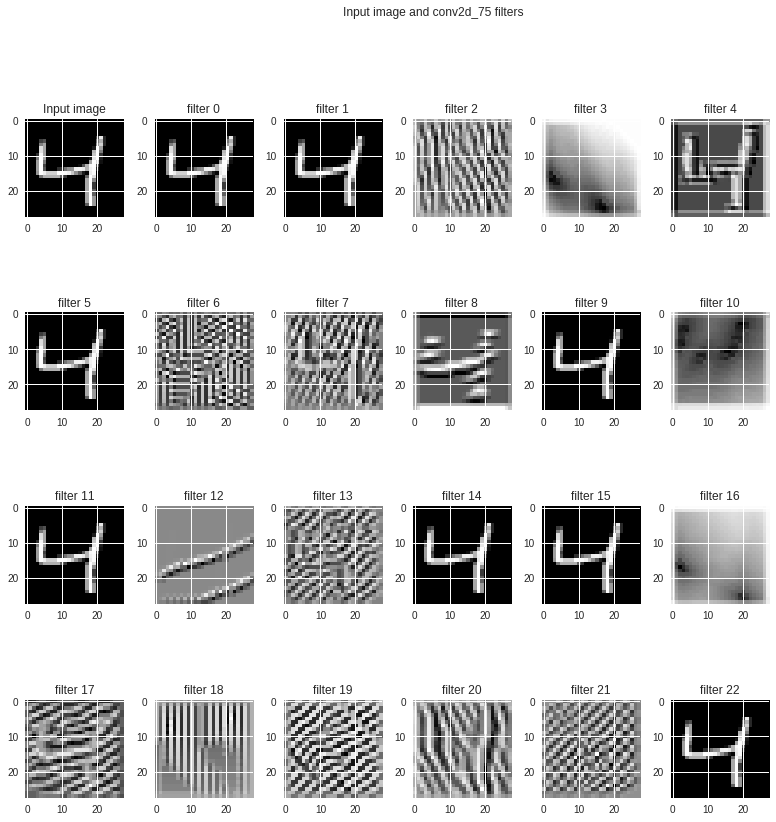

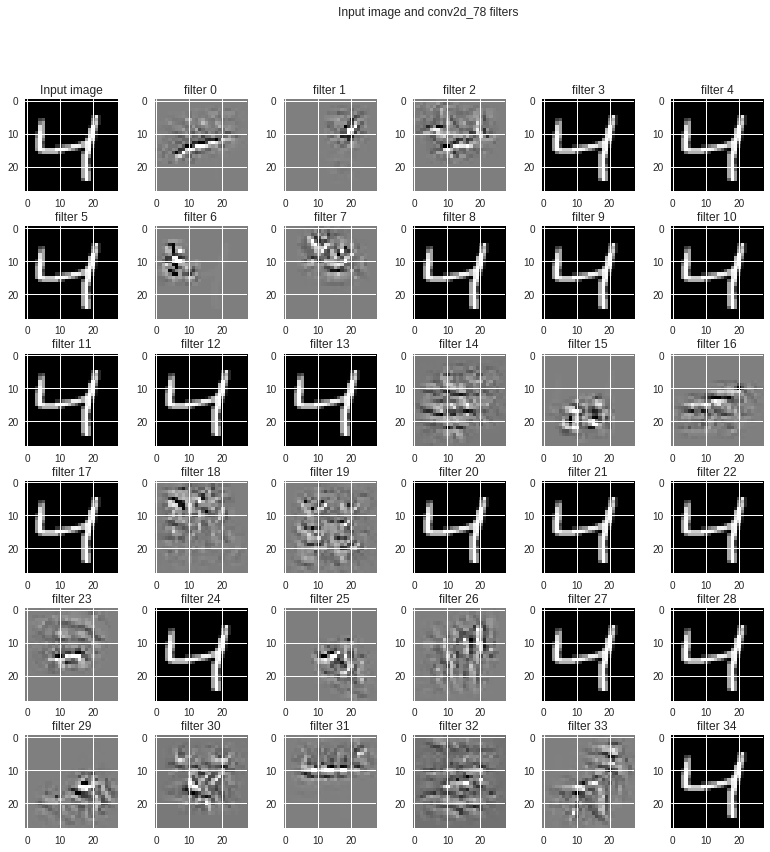

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_78'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name = 'conv2d_75') # output of first conv layer
vis_img_in_filter()